## Preamble

This was taken and slightly adapted from the example section of the abjad documentation. I am not the author of the content (only the porting to noteook format). I have removed all diacritics for now.

In [1]:
import abjad
%load_ext abjadext.ipython

# Bartok - Mikrokosmos

We’ll construct the fragment top-down from containers to notes. We could have done it the other way around but it will be easier to keep the big picture in mind this way. Later, you can rebuild the example bottom-up as an exercise.

First let’s create an empty score with a pair of staves connected by a brace:

## The score

We’ll construct the fragment top-down from containers to notes. We could have done it the other way around but it will be easier to keep the big picture in mind this way. Later, you can rebuild the example bottom-up as an exercise.

First let’s create an empty score with a pair of staves connected by a brace:

In [8]:
score = abjad.Score()
piano_staff = abjad.StaffGroup([], context_name='PianoStaff')
upper_staff = abjad.Staff()
lower_staff = abjad.Staff()

In [9]:
piano_staff.append(upper_staff)
piano_staff.append(lower_staff)
score.append(piano_staff)

## The measures

Now let’s add some empty measures:

In [10]:
upper_measures = []
upper_measures.append(abjad.Measure((2, 4), []))
upper_measures.append(abjad.Measure((3, 4), []))
upper_measures.append(abjad.Measure((2, 4), []))
upper_measures.append(abjad.Measure((2, 4), []))
upper_measures.append(abjad.Measure((2, 4), []))

In [11]:
import copy
lower_measures = copy.deepcopy(upper_measures)

In [12]:
upper_staff.extend(upper_measures)
lower_staff.extend(lower_measures)

## The notes

Now let’s add some notes.

We begin with the upper staff:

In [13]:
upper_measures[0].extend("a'8 g'8 f'8 e'8")
upper_measures[1].extend("d'4 g'8 f'8 e'8 d'8")
upper_measures[2].extend("c'8 d'16 e'16 f'8 e'8")
upper_measures[3].append("d'2")
upper_measures[4].append("d'2")

The first three measures of the lower staff contain only one voice:

In [14]:
lower_measures[0].extend("b4 d'8 c'8")
lower_measures[1].extend("b8 a8 af4 c'8 bf8")
lower_measures[2].extend("a8 g8 fs8 g16 a16")

The last two measures of the lower staff contain two voices each.

We use LilyPond \voiceOne and \voiceTwo commands to set the direction of stems in different voices. And we set is_simltaneous to true for each of the last two measures:


In [15]:
upper_voice = abjad.Voice("b2", name='upper voice')
command = abjad.LilyPondCommand('voiceOne')
abjad.attach(command, upper_voice)
lower_voice = abjad.Voice("b4 a4", name='lower voice')
command = abjad.LilyPondCommand('voiceTwo')
abjad.attach(command, lower_voice)
lower_measures[3].extend([upper_voice, lower_voice])
lower_measures[3].is_simultaneous = True

In [16]:
upper_voice = abjad.Voice("b2", name='upper voice')
command = abjad.LilyPondCommand('voiceOne')
abjad.attach(command, upper_voice)
lower_voice = abjad.Voice("g2", name='lower voice')
command = abjad.LilyPondCommand('voiceTwo')
abjad.attach(command, lower_voice)
lower_measures[4].extend([upper_voice, lower_voice])
lower_measures[4].is_simultaneous = True

Here’s our work so far:

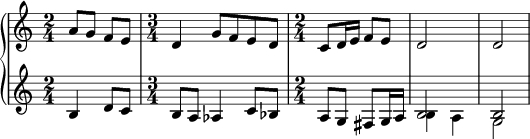

In [17]:
show(score)

## The details

Ok, let’s add the details. First, notice that the bottom staff has a treble clef just like the top staff. Let’s change that:

In [19]:
leaf = abjad.inspect(lower_staff).get_leaf(0)
abjad.attach(abjad.Clef('bass'), leaf)

Now let’s add dynamics. For the top staff, we’ll add them to the first note of the first measure and the second note of the second measure. For the bottom staff, we’ll add dynamicings to the second note of the first measure and the fourth note of the second measure:


In [20]:
abjad.attach(abjad.Dynamic('pp'), upper_measures[0][0])

In [21]:
abjad.attach(abjad.Dynamic('mp'), upper_measures[1][1])

In [22]:
abjad.attach(abjad.Dynamic('pp'), lower_measures[0][1])

In [23]:
abjad.attach(abjad.Dynamic('mp'), lower_measures[1][3])

Let’s add a double bar to the end of the piece:

In [24]:
score.add_final_bar_line()

BarLine('|.')

And see how things are coming out:

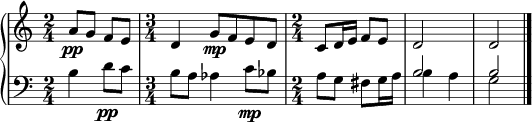

In [25]:
show(score)

Notice that the beams of the eighth and sixteenth notes appear as you would usually expect: grouped by beat. We get this for free thanks to LilyPond’s default beaming algorithm. But this is not the way Bartók notated the beams. Let’s set the beams as Bartók did with some crossing the bar lines:

In [26]:
upper_leaves = abjad.select(upper_staff).by_leaf()
lower_leaves = abjad.select(lower_staff).by_leaf()

In [27]:
abjad.attach(abjad.Beam(), upper_leaves[:4])

In [28]:
abjad.attach(abjad.Beam(), lower_leaves[1:5])

In [30]:
abjad.attach(abjad.Beam(), lower_leaves[6:10])

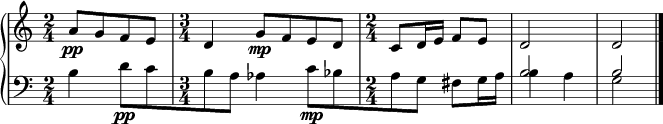

In [31]:
show(score)

Now some slurs:

In [33]:
abjad.attach(abjad.Slur(), upper_leaves[:5])

In [34]:
abjad.attach(abjad.Slur(), upper_leaves[5:])

In [36]:
abjad.attach(abjad.Slur(), lower_leaves[1:6])

Hairpins:

In [37]:
abjad.attach(abjad.Hairpin('<'), upper_leaves[-7:-2])

In [38]:
abjad.attach(abjad.Hairpin('>'), upper_leaves[-2:])

A ritardando marking above the last seven notes of the upper staff:

In [39]:
markup = abjad.Markup('ritard.')
text_spanner = abjad.TextSpanner()
abjad.override(text_spanner).text_spanner.bound_details__left__text = markup
abjad.attach(text_spanner, upper_leaves[-7:])

And ties connecting the last two notes in each staff:

In [40]:
abjad.attach(abjad.Tie(), upper_leaves[-2:])

In [42]:
note_1 = lower_staff[-2]['upper voice'][0]
note_2 = lower_staff[-1]['upper voice'][0]
notes = abjad.select([note_1, note_2])
abjad.attach(abjad.Tie(), notes)

The final result:

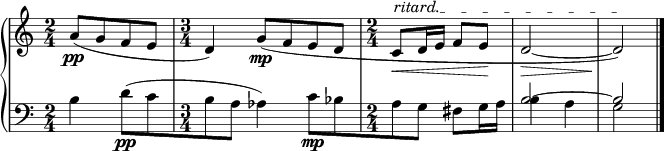

In [43]:
show(score)